Student's Name and Email Address

Boise State University, Department of Chemistry and Biochemistry

## CHEM 324: PChem Lab {-}
# Worksheet 3: Transient Absorption Spectroscopy {-}

In [82]:
# @title Notebook Setup { display-mode: "form" }
# Import the main modules used in this worksheet
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from sklearn.linear_model import LinearRegression


# The following needs to be the path of the folder with all your datafile in .csv format
base_path = '/Users/School/PycharmProjects/PChemLab/ModelingData/'

In [83]:
# @title Set Local Path { display-mode: "form" }
# The following needs to be the path of the folder with all your collected data in .csv format
# @param {type:"string"}
path = "/Users/School/PycharmProjects/PChemLab/TA_Data/Transient_Absorption/"

In [84]:
# @title Functions to load the data { display-mode: "form" }
def load_data_to_file_dict(file_dict):
    """
    Load a Transient Absorption Spectroscopy .csv file. 
    The format of the file should have one row of header, semicolon as separator, and colon as decimal separator

    Input variables:
        file_dict : a dictionary with 'path' and 'name' keys corresponding to the file to be loaded
    
    Action: 
        Add to file_dict a Pandas DataFrame with multiple columns: Laser Delay (in nanoseconds)
        and one column for each TA run in units of mOD
    """
    data = pd.read_csv(file_dict['path']+file_dict['name'],sep=';',decimal='.')
    file_dict['data'] = data
    return

def plot_file_dict(file_dict, yaxis = 'all'):
    """ 
    Given a file dictionary, plot one of the transient absorption curves (or the average)
    versus the laser delay
    """
    if not ('data' in file_dict): 
        load_data_to_file_dict(file_dict)
    if yaxis == 'all':
        for column in file_dict['data'].columns:
            if column == 'Laser Delay [ns]' : continue
            plt.plot(file_dict['data']['Laser Delay [ns]'],file_dict['data'][column],label=column)
    else : 
        if yaxis in file_dict['data'].columns:
            plt.plot(file_dict['data']['Laser Delay [ns]'],file_dict['data'][yaxis],label=yaxis)
        else:
            print('ERROR: specified yaxis is not in the read data')
    plt.ylabel('Transient Absorption [mOD]')
    plt.xlabel('Laser Delay [ns]')
    plt.legend()
    plt.show()

def plot_file_list(file_list,yaxis = 'TA1 [mOD]'):
    """
    Given a list of dictionary files, plot one of the transient absorption curves (or the average)
    versus the laser delay for each of the files
    """
    #
    fig, ax = plt.subplots()
    #
    for file_dict in file_list : 
        (file_dict)
        plt.plot(file_dict['data']['Laser Delay [ns]'],file_dict['data'][yaxis],label=file_dict['label'])
    plt.ylabel('Transient Absorption [mOD]')
    plt.xlabel('Laser Delay [ns]')
    plt.legend()
    plt.show()

In [85]:
# @title Utilities to analyze the data { display-mode: "form" }
def exponential(t, a, tau, o):
    """ 
    Function that returns an exponentially decaying function plus offset
    f(t) = o + a*e^(-t/tau)

    input variables
    t: input value (units of time)
    a: amplitude (units of absorbance or concentration)
    tau: lifetime (units of time)
    o: offset (units of absorbance or concentration)
    """
    if tau < 1.e-10 : 
        print('ERROR: choose a value of tau greater than zero')
        return 0.
    return a * np.exp(-t/tau) + o

def fit_ta_data(file_dict, yaxis = 'TA1 [mOD]', verbose = False, semilog = False):
    """ 
    Perform the fit of transient absorption decay curves using an exponential 
    functions plus offset. 

    Input parameters: 
    file_dict: a dictionary with information on the file with the data (path and name) and
               adjustable parameters related to the fit:
               time_skip : initial transient regime to remove from the fit
               C0_guess, k_guess, offset_guess: starting guess of fitting parameters
    yaxis : the column of the dataframe to use for the fit
    verbose : if True plot the filtered data and the corresponding fit
    semilog : if True, plot in semilogy scale

    Action: 
           Filter the data by removing the initial time_skip part of the curve
           Fit according to an exponential decay
           Save the optimized values of the parameters and their standard errors in file_dict
           Save the fitted curve in the file_dict['data'] DataFrame
    """   
    if not ('data' in file_dict): 
        load_data_to_file_dict(file_dict)
    xaxis = 'Laser Delay [ns]'
        
    file_dict['filtered_data'] = file_dict['data'][file_dict['data']['Laser Delay [ns]']>file_dict['time_skip']].copy()
    x = file_dict['filtered_data'][xaxis]
    y = file_dict['filtered_data'][yaxis]

    funct = exponential
    p0 = (file_dict['DA0_guess'],file_dict['tau_guess'],file_dict['offset_guess'])
    params, cv = scipy.optimize.curve_fit(funct,x,y,p0)

    file_dict['DA0'] = params[0]
    file_dict['DA0_SE'] = np.sqrt(cv[0,0])
    file_dict['tau'] = params[1]
    file_dict['tau_SE'] = np.sqrt(cv[1,1])
    file_dict['offset'] = params[2] 
    file_dict['offset_SE'] = np.sqrt(cv[2,2])

    file_dict['filtered_data']['TA_fitted'] = funct(x,params[0],params[1],params[2])

    if verbose :
        if semilog :
            plt.semilogy(x,y,label=yaxis)
            plt.semilogy(x,funct(x,params[0],params[1],params[2]),label='Fit')
        else :
            plt.plot(x,y,label=yaxis)
            plt.plot(x,funct(x,params[0],params[1],params[2]),label='Fit')
        plt.ylabel('Transient Absorption [mOD]')
        plt.xlabel('Laser Delay [ns]')
        plt.legend()
        plt.show()

The functions below are incomplete and will need to be completed by the student.

In [86]:
def calc_average_TA(file_dict):
    """
    Average all the TA runs recorded in a TA .csv file.

    Input variables:
        file_dict : a dictionary with 'path' and 'name' keys corresponding to the file to be loaded
    
    Action: 
        Create a new column in the file_dict['data'] component of the input with the average
        of the TA runs recorded in the file
    """
    if not ('data' in file_dict): 
        load_data_to_file_dict(file_dict)
    columns = file_dict['data'].columns.drop('Laser Delay [ns]')
    if 'TAaverage' in file_dict['data'].columns: 
        columns = columns.drop('TAaverage')
    # the variable columns is a list that contains the columns of the dataframe you need to average
    file_dict['data']['TAaverage'] = file_dict['data'][columns].mean(axis=1)
    return

def calc_max_TA(file_dict):
    """
    Given a file dictionary with the average TA, find the maximum value of the transient absorption 
    and the Laser Delay at which this value occurs

    Input variables:
        file_dict : a dictionary with 'path' and 'name' keys corresponding to the file to be loaded
    
    Action: 
        
    """
    if not ('data' in file_dict): 
        load_data_to_file_dict(file_dict)
    if not ('TAaverage' in file_dict['data'].columns): 
        calc_average_TA(file_dict)


    max_index = file_dict['data']['TAaverage'].idxmax()


    file_dict['TAmax'] = file_dict['data']['TAaverage'].iloc[max_index]
    file_dict['LD_TAmax'] = file_dict['data']['Laser Delay [ns]'].iloc[max_index]
    return

## Task 1: Average of TA Spectra {-}

* Visualize the chemical structures of ZnTPP (CAS 14074-80-7) and comment on why this molecule is absorbing in the visible.
* Load the TA spectra for the first concentration of ZnTPP into a Pandas DataFrame. Average the scans and save them as an extra column in the DataFrame. 
* Plot the different TA spectra for the first concentration of ZnTPP together with the averaged spectra. You will need to present one figure containing all scans and the averaged one. 

In [87]:
file1 = {'path':path, 'name':'TA_traces.csv', 'label':'Run1', '[ZnTPP]': 0.2, '[C70]':0., 'time_skip':0, 'DA0_guess':1., 'tau_guess':1., 'offset_guess':0.}

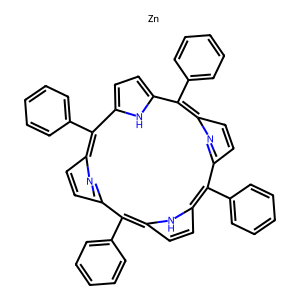

In [96]:
# @title Choose the molecule to draw { display-mode: "form" }
from rdkit import Chem
from rdkit.Chem import Draw
import cirpy

# Define input and input type
input_molecule = '5,10,15,20-Tetraphenyl-21H,23H-porphine zinc'
input_type = 'name'

# Fetch the SMILES string using CIRpy
if input_type != 'smiles':
    smiles = cirpy.resolve(input_molecule, 'smiles')
else:
    smiles = input_molecule

if smiles:
    molecule = Chem.MolFromSmiles(smiles)
    img = Draw.MolToImage(molecule, size=(300, 300))
    display(img)
else:
    print("Unable to retrieve the structure for the given input.")

ZnTPP is a metalloporphyrin complex with zinc (Zn 2+) is coordinated to four nitrogens of the extensively conjugated tetraphenylporphyrin ligand. Porphyrin's extensive π-system lowers the HOMO-LUMO gap to absorb within the visible region.This is something we see often with conjugated polymers and dyes. Demonstrated Soret band (400-450nm) is characteristic of porphyrin compounds. Q-bands also present but weaker and absorbing around 500-700 nm.

## Task 2: TA Spectra for Varying ZnTPP Concentrations {-}

* Load and average the TA spectra for the different ZnTPP concentrations. Explicitly report all the constants and/or known experimental values that you will need in your following analyses. 

In [88]:
file1 = {'path': path, 'name': 'BZ08_JDG.csv', 'label': 'BZ08 (0.8 mM ZnTPP)', '[ZnTPP]': 0.8, '[C70]': 0.0, 'time_skip': 0, 'DA0_guess': 1., 'tau_guess': 10., 'offset_guess': 0.}
file2 = {'path': path, 'name': 'BZ04_JGD.csv', 'label': 'BZ04 (0.4 mM ZnTPP)', '[ZnTPP]': 0.4, '[C70]': 0.0, 'time_skip': 0, 'DA0_guess': 1., 'tau_guess': 10., 'offset_guess': 0.}
file3 = {'path': path, 'name': 'BZ02_JGD.csv', 'label': 'BZ02 (0.2 mM ZnTPP)', '[ZnTPP]': 0.2, '[C70]': 0.0, 'time_skip': 0, 'DA0_guess': 1., 'tau_guess': 10., 'offset_guess': 0.}
file4 = {'path': path, 'name': 'BZC1_JDG.csv', 'label': 'BZC1 (0.4 mM ZnTPP, 0.4 mM C70)', '[ZnTPP]': 0.4, '[C70]': 0.4, 'time_skip': 0, 'DA0_guess': 1., 'tau_guess': 10., 'offset_guess': 0.}
file5 = {'path': path, 'name': 'BZC05_JGD.csv', 'label': 'BZC05 (0.4 mM ZnTPP, 0.2 mM C70)', '[ZnTPP]': 0.4, '[C70]': 0.2, 'time_skip': 0, 'DA0_guess': 1., 'tau_guess': 10., 'offset_guess': 0.}
file6 = {'path': path, 'name': 'BZC01_JGD.csv', 'label': 'BZC01 (0.4 mM ZnTPP, 0.04 mM C70)', '[ZnTPP]': 0.4, '[C70]': 0.04, 'time_skip': 0, 'DA0_guess': 1., 'tau_guess': 10., 'offset_guess': 0.}

experiment1 = [file1, file2, file3, file4, file5, file6]

# Calculate the average of each file in the list
for file in experiment1:
    calc_average_TA(file)

* Plot the averaged TA spectra for the different ZnTPP concentrations. 

In [89]:
# You may want to use the function plot_file_list() and specify to plot the column with the average TA

* What effects on the signal do you observe for different concentrations?
* How can those effects be explained by setup parameters and/or reaction chemistry? 

## Task 3: Max Signal and Time Constants for Varying ZnTPP Concentrations {-}

* For each averaged TA spectra, compute the maximum transient absorption and the delay at which it occurs.

In [90]:
# the following loop will compute the maximum of each averaged TA spectrum and the delay at which it occurs
# NOTE: this function is incomplete and will need you to implement the actual calculations
for file in experiment1:
    calc_max_TA(file)

* Fit the portion of the averaged TA spectra after the peak with an exponential curve with a vertical offset.

In [91]:
# the following loop will compute the maximum of each averaged TA spectrum and the delay at which it occurs
# NOTE: for this function to work you need to have the correct TAaverage column in your data (from Task 1)
for file in experiment1:
    fit_ta_data(file,yaxis='TAaverage')

ERROR: choose a value of tau greater than zero
ERROR: choose a value of tau greater than zero
ERROR: choose a value of tau greater than zero
ERROR: choose a value of tau greater than zero
ERROR: choose a value of tau greater than zero
ERROR: choose a value of tau greater than zero


* Report a table with the quantities computed above.

In [92]:
# assuming that you have succesfully completed the steps above, you can convert your list of files into a dataframe
# which should contain columns with the quantities computed above
experiment1_data = pd.DataFrame(experiment1)
experiment1_data[['[ZnTPP]','TAmax','LD_TAmax','tau','offset']].to_markdown()

'|    |   [ZnTPP] |   TAmax |   LD_TAmax |        tau |    offset |\n|---:|----------:|--------:|-----------:|-----------:|----------:|\n|  0 |       0.8 | 30.0915 |        120 | 1176.12    | -0.205455 |\n|  1 |       0.4 | 20.0212 |        120 | 1292.02    | -0.186473 |\n|  2 |       0.2 | 14.6963 |        120 |    1.44326 |  3.15617  |\n|  3 |       0.4 | 20.7989 |        120 |  797.618   |  2.55194  |\n|  4 |       0.4 | 24.9145 |        120 |  977.498   |  1.26345  |\n|  5 |       0.4 | 26.8297 |        120 | 1198.6     | -0.226051 |'

* Is the single exponential fit adequate? Is a Y-axis offset needed as a free fit parameter?

YOUR COMMENTS HERE

* Are there any trends in the maximum TA, delay of the peak, and lifetime? Briefly comment on possible explanations for trends or lack of them. 

YOUR COMMENTS HERE

## Task 4: Lifetime and Offset for Varying C70 Concentrations {-}

* Load and average the TA spectra for the different C70 concentrations. Explicitly report all the constants and/or known experimental values that you will need in your following analyses. 


* Plot the averaged TA spectra for the different C70 concentrations. 

* Fit each averaged TA spectra with an expontial curve plus Y-offset (similar to the task before). Report the maximum TA, lifetime, and offset for the different C70 
concentrations.
* Is the Y-offset important for these experiments? Give a brief explanation of its origin. 

* Perform a linear fit of the inverse lifetimes (a.k.a. the effective reaction constants) as a function of the concentration of C70. 
* From the slope of the linear fit, compute the reaction constant $k_q$ and report it using the correct units.

In [93]:
# This cell is used to allow Google Colab to install the tools to convert the notebook to a pdf file
# Un-comment the following lines when you are ready to export the pdf 
#!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
#!pip install pypandoc

In [94]:
# Use this command to convert the finished worksheet into a pdf 
# NOTE : you may want to change the path of the file, if you are working in a different folder of the Google Drive
#!jupyter nbconvert --no-input --to PDF "/content/drive/MyDrive/Colab Notebooks/TA_Worksheet.ipynb"